## <font color=blue>Javier Antonio García Perdomo </font>
## <font color=red>21004161</font>
## Maestría en Data Science
## <font color=green>Ciencia de Datos en Python V </font>
## <font color=red>05/03/2021</font>

# <h1><center><font color=green>Proyecto Final</font>  

<b>Descripción</b>: El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:
<center> y = β0 + β1 ∗ x

A continuación se le listan los pasos que debería seguir para poder desarrollar su proyecto:

    1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [1]:
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

    2. Usando slicing con NumPy separar los datos en 2 datasets: entrenamiento (80 %) y validación y pruebas(20 %).

In [2]:
All_data0 = np.load(os.path.expanduser("~/Desktop/proyecto_training_data.npy"))
cantidad_datos=np.count_nonzero(All_data0[:,0])

Y=All_data0[:,0]
X1=All_data0[:,1]
X2=All_data0[:,2]
X3=All_data0[:,3]
X4=All_data0[:,4]
X5=All_data0[:,5]
df = pd.DataFrame()
df['SalePrice']=pd.Series(Y)
df['OverallQual']=pd.Series(X1)
df['1stFlrSF']=pd.Series(X2)
df['TotRmsAbvGrd']=pd.Series(X3)
df['YearBuilt']=pd.Series(X4)
df['LotFrontage']=pd.Series(X5)
print("Previsualización de los datos:")
print(df.head())
print("Estadísticas de los dats")
print(df.describe())
 
indices_validacion=random.sample(range(0, cantidad_datos), int(cantidad_datos/5))

indices_entrenamiento=[]
for i in range(0,cantidad_datos):
    if i not in indices_validacion:
        indices_entrenamiento.append(i)
        
data_entrenamiento=[]
for i in indices_entrenamiento:
    data_entrenamiento.append(All_data0[i])
print("Cantidad de datos para entrenamiento: ",len(data_entrenamiento))
    
data_validacion=[]
for i in indices_validacion:
    data_validacion.append(All_data0[i])
print("Cantidad de datos para validación y pruebas: ",len(data_validacion))

Previsualización de los datos:
   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
Estadísticas de los dats
           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  108

   3. Análisis exploratorio de datos: Para cada variable en el dataset calcular ((usando numpy o pandas):
* media
* valor máximo
* valor mínimo
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1) 
* desviación estándar.

________________________________________________________________________
Y = SalePrice  .   # precio de venta de las propiedades (en $ dólares)

In [3]:
Y=All_data0[:,0]
print("El precio medio de venta de las propiedades es: $",
      round(np.average(Y),2))
print("El valor de venta máximo es: $", round(np.max(Y),2))
print("El valor de venta mínimo es: $", round(np.min(Y),2))
print("Por lo tanto el rango de venta es: $", round(np.ptp(Y),2))
print("La desviación estándar para el precio de venta es: $", round(np.std(Y),2))

El precio medio de venta de las propiedades es: $ 180921.2
El valor de venta máximo es: $ 755000.0
El valor de venta mínimo es: $ 34900.0
Por lo tanto el rango de venta es: $ 720100.0
La desviación estándar para el precio de venta es: $ 79415.29


________________________________________________________________________
X1 = OverallQual    .   # Calidad general del material y el acabado, califica el material general y el acabado de la casa.
- 10	Very Excellent
- 9	Excellent
- 8	Very Good
- 7	Good
- 6	Above Average
- 5	Average
- 4	Below Average
- 3	Fair
- 2	Poor
- 1	Very Poor

In [4]:
X1=All_data0[:,1]
print("- El promedio del 'Material general y calidad de acabados', es de:",
      round(np.average(X1),3)," (escala de 1 a 10)")
print("- El valor máximo para 'Material general y calidad de acabados' es: ",
      round(np.max(X1),2))
print("- El valor mínimo para 'Material general y calidad de acabados' es: ", 
      round(np.min(X1),2))
print("- Por lo tanto el rango para 'Material general y calidad de acabados' es: ", 
      round(np.ptp(X1),2))
print("- La desviación estándar para 'Material general y calidad de acabados' es: ", 
      round(np.std(X1),2))

- El promedio del 'Material general y calidad de acabados', es de: 6.099  (escala de 1 a 10)
- El valor máximo para 'Material general y calidad de acabados' es:  10.0
- El valor mínimo para 'Material general y calidad de acabados' es:  1.0
- Por lo tanto el rango para 'Material general y calidad de acabados' es:  9.0
- La desviación estándar para 'Material general y calidad de acabados' es:  1.38


________________________________________________________________________
X2 = 1stFlrSF     .    #Pies cuadrados del primer piso

In [5]:
X2=All_data0[:,2]
print("- El promedio del área del primer piso de las propiedades es de:",
      round(np.average(X2),2),"ft²")
print("- El área máxima del primer piso de las propiedades es: ", 
      round(np.max(X2),2),"ft²")
print("- El área mínima del primer piso de las propiedades es: ", 
      round(np.min(X2),2),"ft²")
print("- Por lo tanto el rango para el área del primer piso de las propiedades es: ", 
      round(np.ptp(X2),2),"ft²")
print("- La desviación estándar para el área del primer piso de las propiedades es: ", 
      round(np.std(X2),2),"ft²")

- El promedio del área del primer piso de las propiedades es de: 1162.63 ft²
- El área máxima del primer piso de las propiedades es:  4692.0 ft²
- El área mínima del primer piso de las propiedades es:  334.0 ft²
- Por lo tanto el rango para el área del primer piso de las propiedades es:  4358.0 ft²
- La desviación estándar para el área del primer piso de las propiedades es:  386.46 ft²


________________________________________________________________________
X3 = TotRmsAbvGrd   .  # Total de habitaciones sobre rasante (sin incluir baños)

In [6]:
X3=All_data0[:,3]
print("- El promedio del número de habitaciones sobre rasante es de:",
      round(np.average(X3),2))
print("- El máximo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.max(X3),2))
print("- El mínimo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.min(X3),2))
print("- El rango para el número de habitaciones sobre rasante de las propiedades es: ", 
      round(np.ptp(X3),2))
print("- La desviación estándar para el # de habitaciones sobre rasante de las propiedades es: ", 
      round(np.std(X3),2))

- El promedio del número de habitaciones sobre rasante es de: 6.52
- El máximo número de habitaciones sobre rasante para una propiedad es de:  14.0
- El mínimo número de habitaciones sobre rasante para una propiedad es de:  2.0
- El rango para el número de habitaciones sobre rasante de las propiedades es:  12.0
- La desviación estándar para el # de habitaciones sobre rasante de las propiedades es:  1.62


________________________________________________________________________
X4 = YearBuilt   .    # año de la fecha de construcción original

In [7]:
X4=All_data0[:,4]
print("- El promedio del año de las fechas de construcción original es:",
      round(np.average(X4),2))
print("- El año más reciente para las fechas de construcción original es: ", 
      round(np.max(X4),2))
print("- El año más antiguo para las fechas de construcción original es: ", 
      round(np.min(X4),2))
print("- El rango para el año de las fechas de construcción original es: ", 
      round(np.ptp(X4),2))
print("- La desviación estándar para el año de las fechas de construcción original es: ", 
      round(np.std(X4),2))

- El promedio del año de las fechas de construcción original es: 1971.27
- El año más reciente para las fechas de construcción original es:  2010.0
- El año más antiguo para las fechas de construcción original es:  1872.0
- El rango para el año de las fechas de construcción original es:  138.0
- La desviación estándar para el año de las fechas de construcción original es:  30.19


________________________________________________________________________
X5 = LotFrontage     .    # pies lineales de calle conectados a la propiedad

In [8]:
X5=All_data0[:,5] 
contador=0
for i in X5:
    if i==0:
        contador+=1
print(contador, "valores iguales a 0 en la variable")
print("- El promedio de pies lineales de calle conectados a las propiedades es de:",
      round(np.nanmean(X5),2),"ft")
print("- El máximo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmax(X5),2),"ft")
print("- El mínimo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmin(X5),2),"ft²")
print("- El rango de pies lineales de calle conectados a las propiedades es de: ",
      round(np.nanmax(X5)-np.nanmin(X5),2),"ft")
print("- La desviación estándar de pies lineales de calle conectados a las propiedades es: ",
      round(np.nanstd(X5),2),"ft")
X5= [0 if x != x else x for x in X5]
print("Se tomo la decisión de convertir todos los nan a 0 para el análisis, pues no se tiene más información")

0 valores iguales a 0 en la variable
- El promedio de pies lineales de calle conectados a las propiedades es de: 70.05 ft
- El máximo de pies lineales de calle conectados a una propiedad es de:  313.0 ft
- El mínimo de pies lineales de calle conectados a una propiedad es de:  21.0 ft²
- El rango de pies lineales de calle conectados a las propiedades es de:  292.0 ft
- La desviación estándar de pies lineales de calle conectados a las propiedades es:  24.27 ft
Se tomo la decisión de convertir todos los nan a 0 para el análisis, pues no se tiene más información


 4. Para cada variable en el dataset usar seaborn (función distplot https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.
 
<span style='background:orange'> Warning
    This function (seaborn.distplot) is deprecated and will be removed in a future version. Please adapt your code to use one of two new functions:
    
    - displot(), a figure-level function with a similar flexibility over the kind of plot to draw
    
    - histplot(), an axes-level function for plotting histograms, including with kernel density smoothing 
</span>

________________________________________________________________________
Y = SalePrice  

Text(0.5, 0, 'SalePrice')

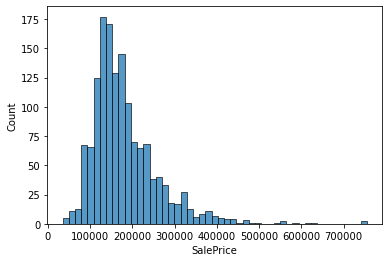

In [9]:
aY = sns.histplot( data=Y)
aY.set_xlabel("SalePrice")

________________________________________________________________________
X1 = OverallQual    

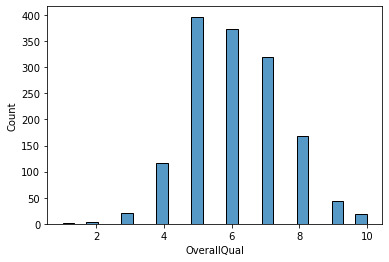

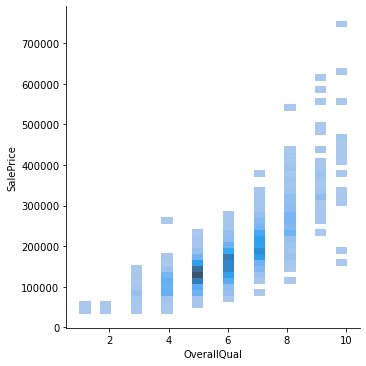

In [10]:
aX1 = sns.histplot(data=X1)
aX1.set_xlabel("OverallQual")
bX1 = sns.displot(y=Y, x=X1)
bX1.set_axis_labels("OverallQual", "SalePrice")

________________________________________________________________________
X2 = 1stFlrSF  

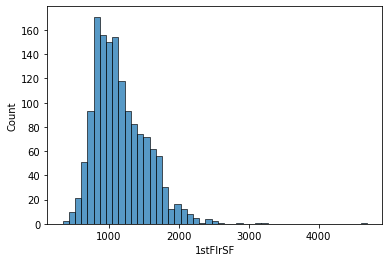

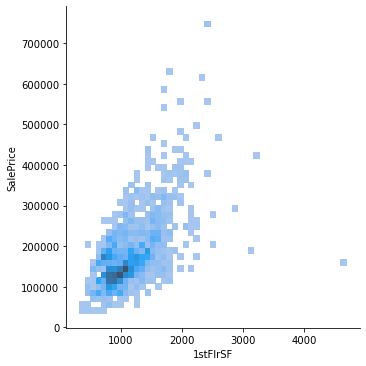

In [11]:
aX2 = sns.histplot(data=X2)
aX2.set_xlabel("1stFlrSF")
bX2 = sns.displot(y=Y, x=X2)
bX2.set_axis_labels("1stFlrSF", "SalePrice")

________________________________________________________________________
X3 = TotRmsAbvGrd   

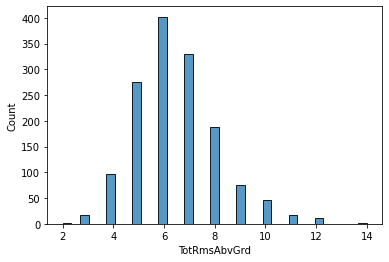

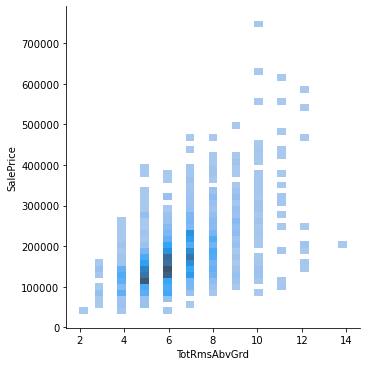

In [12]:
aX3 = sns.histplot(data=X3)
aX3.set_xlabel("TotRmsAbvGrd")
bX3 = sns.displot(y=Y, x=X3)
bX3.set_axis_labels("TotRmsAbvGrd", "SalePrice")

________________________________________________________________________
X4 = YearBuilt  

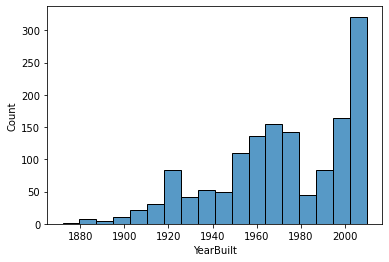

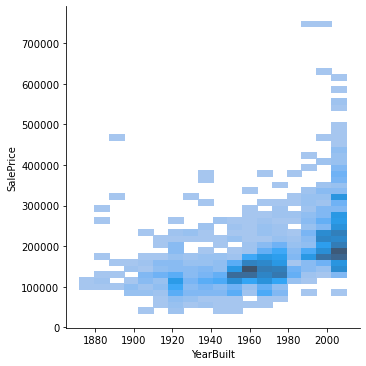

In [13]:
aX4 = sns.histplot(data=X4)
aX4.set_xlabel("YearBuilt")
bX4 = sns.displot(y=Y, x=X4)
bX4.set_axis_labels("YearBuilt", "SalePrice")

________________________________________________________________________
X5 = LotFrontage  

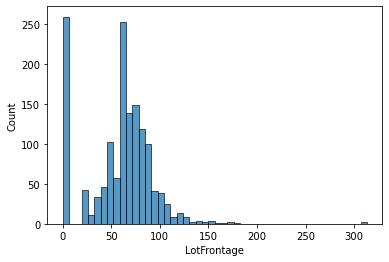

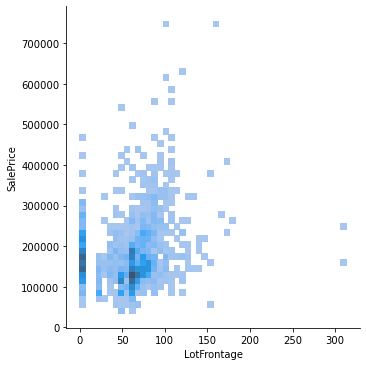

In [14]:
aX5 = sns.histplot(data=X5)
aX5.set_xlabel("LotFrontage")
bX5 = sns.displot(y=Y, x=X5)
bX5.set_axis_labels("LotFrontage", "SalePrice")

  5. Para cada variable independiente x :
 - Calcular el coeficiente de correlación entre x y y.
 - Graficar x vs y (scatterplot) usando matplotlib.
 - Colocar el coeficiente de correlación como parte del título de la gráfica.
 - Basado en la gráfica y el coeficiente de correlación de cada par (x,y) elegir las 2 variables con más potencial predictivo. Es decir, las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.

________________________________________________________________________
X1 = OverallQual  

El coeficiente de correlación entre el precio de venta y la calidad general del material y el acabado es:  0.79098


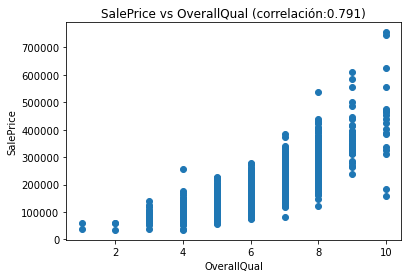

In [15]:
rho_Y_X1=np.corrcoef(x=Y,y=X1)[1][0]
print("El coeficiente de correlación entre el precio de venta y la calidad general del material y el acabado es: ", round(rho_Y_X1,5))
plt.scatter(X1,Y)
plt.title("SalePrice vs OverallQual (correlación:"+str(round(rho_Y_X1,4))+")")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X2 = 1stFlrSF  

El coeficiente de correlación entre el precio de venta y el área del primer piso (ft²) de las propiedades es:  0.6059


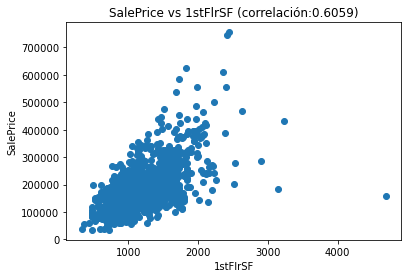

In [16]:
rho_Y_X2=np.corrcoef(x=Y,y=X2)[1][0]
print("El coeficiente de correlación entre el precio de venta y el área del primer piso (ft²) de las propiedades es: ", round(rho_Y_X2,4))
plt.scatter(X2,Y)
plt.title("SalePrice vs 1stFlrSF (correlación:"+str(round(rho_Y_X2,4))+")")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X3 = TotRmsAbvGrd 

El coeficiente de correlación entre el precio de venta y el total de habitaciones sobre rasante es:  0.5337


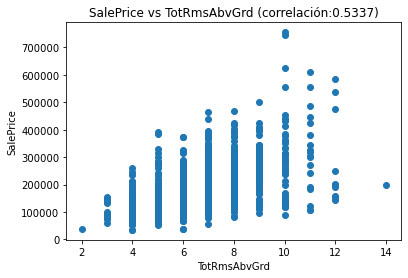

In [17]:
rho_Y_X3=np.corrcoef(x=Y,y=X3)[1][0]
print("El coeficiente de correlación entre el precio de venta y el total de habitaciones sobre rasante es: ", round(rho_Y_X3,4))
plt.scatter(X3,Y)
plt.title("SalePrice vs TotRmsAbvGrd (correlación:"+str(round(rho_Y_X3,4))+")")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X4 = YearBuilt 

El coeficiente de correlación entre el precio de venta y el año de construcción es:  0.5229


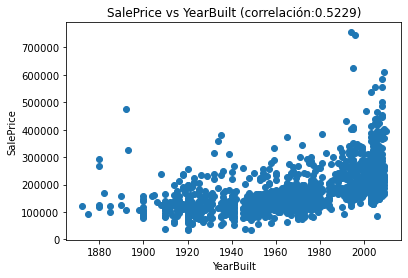

In [18]:
rho_Y_X4=np.corrcoef(x=Y,y=X4)[1][0]
print("El coeficiente de correlación entre el precio de venta y el año de construcción es: ", round(rho_Y_X4,4))
plt.scatter(X4,Y)
plt.title("SalePrice vs YearBuilt (correlación:"+str(round(rho_Y_X4,4))+")")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X5 = LotFrontage  

El coeficiente de correlación entre el precio de venta y pies lineales de calle conectados a las propiedades es:  0.2096


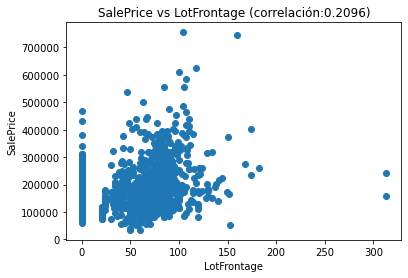

In [19]:
rho_Y_X5=np.corrcoef(x=Y,y=X5)[1][0]
print("El coeficiente de correlación entre el precio de venta y pies lineales de calle conectados a las propiedades es: ", round(rho_Y_X5,4))
plt.scatter(X5,Y)
plt.title("SalePrice vs LotFrontage (correlación:"+str(round(rho_Y_X5,4))+")")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

Con base en las gráficas y los coeficiente de correlación entre cada variable X y la variable Y se elegió las 2 variables con más potencial predictivo, que son **X1 = OverallQual** y **X2 = 1stFlrSF**.

 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x. La función recibe como argumentos:
     - 6.1 Vector con la variable independiente x,
     - 6.2 Vector con la variable dependiente y,
     - 6.3 un entero **epochs** que indica por cuantas iteraciones entrenar el modelo.
     - 6.4 un entero **imprimir_error_cada** , que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
     - 6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [32]:
def error_costo(x,y,beta0,beta1):
    costo=0.0
    for i in range(len(x)):
        pred=beta0+beta1*x[i]
        costo=(y[i]-pred)**2
    costo=costo/(2*len(x))
    return costo
    
def entrenador_lineal(x,y,epochs,imprimir_error_cada,alpha):
    matrizX=np.ones((len(y),2))
    for i in range(len(y)):
        matrizX[i][0]=x[i]
    print(matrizX)
    beta1=0 #sum(y)/sum(x)
    beta0=0 #sum(x)/(2*len(x))
    hist_costo=[]
    hist_costo.append(error_costo(x,y,beta0,beta1))
    y_predicciones=[]
    y_predicciones.append(np.dot(matrizX,[beta1,beta0]))
    for epo in range(epochs):
        beta0_d=0.0
        beta1_d=0.0
        for i in range(len(y)):
            pred=beta0+beta1*x[i]
            beta1_d+=(pred-y[i])*x[i]
            beta0_d+=pred-y[i]
        beta0 -=(beta0_d/len(y))*alpha
        beta1 -=(beta1_d/len(y))*alpha
        hist_costo.append(error_costo(x,y,beta0,beta1))
        y_predicciones.append(np.dot(matrizX,[beta1,beta0]))
        if epo%imprimir_error_cada==0:
            print(error_costo(x,y,beta0,beta1))
        if error_costo(x,y,beta0,beta1)<5:
            break
    print("beta0: ",beta0)
    print("beta1: ",beta1)
    beta=[beta1,beta0]
    y_pred=np.dot(matrizX,beta)
    print(y)
    print(y_pred)
    return beta0, beta1
#        print("costo: ",costo)
#        grad_costo=[sum((y-y_pred)*x)/len(y),sum(y-y_pred)/len(y)]
#        print(grad_costo[0])
#        print(grad_costo[1])
#        beta1=beta1-alpha*grad_costo[0]
#        print("beta1: ",beta1)
#        beta0=beta0-alpha*grad_costo[1]
#        print("beta0: ",beta0)
#        y_pred=np.dot(matrizX,[beta1,beta0])
#        print(y_pred)
#entrenador_lineal([25,22,19,24,19,18,20,15,20,21],[121,123,108,118,111,109,114,103,110,115],50,1,0.001)
entrenador_lineal(X1,Y,800,25,0.008)

[[7. 1.]
 [6. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [5. 1.]
 [5. 1.]]
3318576.328690524
9864.199171349012
9137.840091430635
8423.441707349208
7744.488189902552
7100.102529310351
6489.424808618526
5911.613328052566
5365.8442420885085
4851.311203472241
4367.225014144978
3912.8132829406636
3487.320089926591
3090.0056572603025
2720.146026436994
2377.0327418064926
2059.972540237972
1768.287046816075
1501.312476451708
1258.3993412950388
1038.912163839137
842.2291956051289
667.7421413014835
514.855888353407
382.98824169848467
271.5696637477272
180.04301941360464
107.86332610653497
54.49750860596777
19.424158711258286
beta0:  -20324.878933767428
beta1:  33588.37628374152
[208500. 181500. 223500. ... 266500. 142125. 147500.]
[214793.75505242 181205.37876868 214793.75505242 ... 214793.75505242
 147617.00248494 147617.00248494]


(-20324.878933767428, 33588.37628374152)

In [35]:
def desc_de_gradiente(x, y, epochs, alpha):
    beta0 = 0
    beta1 = 0
    m = len(x)
    for epo in range(epochs):
        d_beta0 = 0
        d_beta1 = 0
        for j in range(m):
            y_pred= beta0 + beta1 * x[j]
            d_beta0 = (2/m) * (y_pred - y[j]) #Derivada del costo respecto a beta0
            d_beta1 = (2/m) * x[j] * (y_pred - y[j]) #Derivada del costo respecto a beta1
            beta0 -= (alpha * d_beta0)
#            print(beta0)
            beta1 -= (alpha * d_beta1) 
#            print(beta1)
    print(beta0, beta1)
    return beta0, beta1
desc_de_gradiente([25,22,19,24,19,18,20,15,20,21],[121,123,108,118,111,109,114,103,110,115],100,0.001)
desc_de_gradiente(X1,Y,700,0.001)

0.5376354348410891 5.535250201065822
-1880.7748074325682 30705.78389876453


(-1880.7748074325682, 30705.78389876453)

In [ ]:
print(df.iloc[1400])